In [1]:
import pandas

import seaborn

In [2]:
# load scores
scores = {}

for i in range(3, 11):
    tmp = {}
    with open(f"scores_d{i}.tsv", 'r') as f:
        data = f.read().splitlines()
        for line in data:
            line_splitted = line.split('\t')
            gene, score = line_splitted
            tmp[gene] = float(score)
    
    scores[i] = tmp

In [7]:
df = pandas.DataFrame.from_dict(scores.get(3), 
                                     orient='index', 
                                     columns=['score'])

df['d_max'] = int(3)

In [8]:
for k in scores.keys():
    if k == 3:
        continue
    df_tmp = pandas.DataFrame.from_dict(scores.get(k),
                                        orient='index',
                                        columns=['score'])
    df_tmp['d_max'] = int(k)
    df = pandas.concat([df, df_tmp])

In [9]:
df

,score,d_max
ENSG00000065559,0.001612,3
ENSG00000128591,0.001813,3
ENSG00000077522,0.003115,3
ENSG00000138347,0.004255,3
ENSG00000179348,0.002617,3
...,...,...
ENSG00000173578,0.002166,10
ENSG00000104755,0.002251,10
ENSG00000134007,0.002251,10
ENSG00000143278,0.002931,10


<Axes: xlabel='d_max', ylabel='score'>

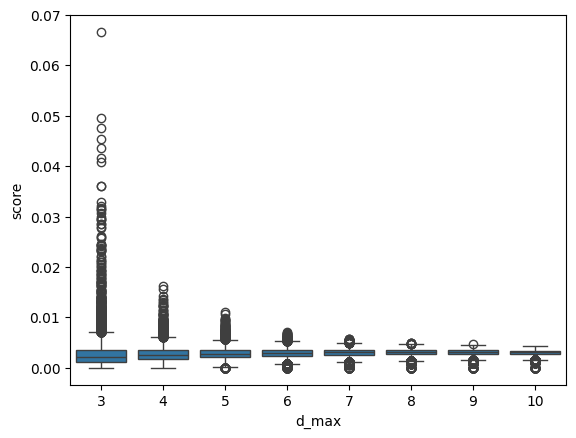

In [11]:
# plot
seaborn.boxplot(data=df, x='d_max', y='score')